# Employee Attrition Prediction

The dataset contains 28 features which are to be used for predicting the probability of whether an employee will leave the company or not. The features were part of three data files - one was collected by an employee survey, which measured job satisfaction and related factors. The second was a manager survey, which measured job involvement and performance rating of the employees. The final file was a General Data file with various details of the employees like Age, Travel Frequency, Department, etc.

There were two other files which have not been included - these measured the punch-in and punch-out times of each employee over the entire year of 2015. It was a lot of complicated data which would unnecessarily add around 260 columns to our data, hence it has not been included.

Source of Data - https://www.kaggle.com/vjchoudhary7/hr-analytics-case-study

The data in the three included files has been combined into a single file, which will now be imported.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv('Employee_Attrition_Data.csv')

In [3]:
df1.head(2)

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Age,Attrition,BusinessTravel,Department,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,1,3.0,4.0,2.0,3,3,51,No,Travel_Rarely,Sales,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,2,3.0,2.0,4.0,2,4,31,Yes,Travel_Frequently,Research & Development,...,0.0,Y,23,8,1,6.0,3,5,1,4


## Data Preprocessing

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
 4   JobInvolvement           4410 non-null   int64  
 5   PerformanceRating        4410 non-null   int64  
 6   Age                      4410 non-null   int64  
 7   Attrition                4410 non-null   object 
 8   BusinessTravel           4410 non-null   object 
 9   Department               4410 non-null   object 
 10  DistanceFromHome         4410 non-null   int64  
 11  Education                4410 non-null   int64  
 12  EducationField           4410 non-null   object 
 13  EmployeeCount            4410 non-null   int64  
 14  Gender                  

### Missing values

In [5]:
df1.isnull().sum()

EmployeeID                  0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
JobInvolvement              0
PerformanceRating           0
Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

All the columns with missing values have data that is integer-only. Using mean for missing values will create data that doesn't make much sense. For example, NumCompaniesWorked will not make sense with a decimal value. The same applies for other three columns with missing values. Hence, the median is used for imputing missing values.

In [6]:
from sklearn.impute import SimpleImputer
df_num = df1.select_dtypes(exclude='object')
df_cat = df1.select_dtypes(include='object')
si = SimpleImputer(strategy = 'median')
df2=si.fit_transform(df_num)
df2 = pd.DataFrame(df2, columns = df_num.columns)

In [7]:
df2=pd.concat([df2,df_cat],axis=1)

In [8]:
df2.isnull().sum()

EmployeeID                 0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
JobInvolvement             0
PerformanceRating          0
Age                        0
DistanceFromHome           0
Education                  0
EmployeeCount              0
JobLevel                   0
MonthlyIncome              0
NumCompaniesWorked         0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
Attrition                  0
BusinessTravel             0
Department                 0
EducationField             0
Gender                     0
JobRole                    0
MaritalStatus              0
Over18                     0
dtype: int64

### Encoding Categorical Variables

In [9]:
X_cat = df2.select_dtypes(include='object')
X_num = df2.select_dtypes(exclude='object')
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_cat_enc=X_cat.apply(le.fit_transform)

In [10]:
df3 = pd.concat([X_num, X_cat_enc],axis=1)

In [11]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   float64
 1   EnvironmentSatisfaction  4410 non-null   float64
 2   JobSatisfaction          4410 non-null   float64
 3   WorkLifeBalance          4410 non-null   float64
 4   JobInvolvement           4410 non-null   float64
 5   PerformanceRating        4410 non-null   float64
 6   Age                      4410 non-null   float64
 7   DistanceFromHome         4410 non-null   float64
 8   Education                4410 non-null   float64
 9   EmployeeCount            4410 non-null   float64
 10  JobLevel                 4410 non-null   float64
 11  MonthlyIncome            4410 non-null   float64
 12  NumCompaniesWorked       4410 non-null   float64
 13  PercentSalaryHike        4410 non-null   float64
 14  StandardHours           

#### Let's remove features that are not relevant for predicting attrition

In [12]:
df4 = df3.drop(['EmployeeID','EmployeeCount', 'Over18'],axis=1)
#Employee ID is not relevant as it is just a counter from 1 to 4410.
# EmployeeCount and Over18 columns have the same value throughout the whole column.

### Univariate Analysis

In [13]:
df4.skew()

EnvironmentSatisfaction   -0.328260
JobSatisfaction           -0.332530
WorkLifeBalance           -0.567064
JobInvolvement            -0.498080
PerformanceRating          1.920574
Age                        0.413005
DistanceFromHome           0.957466
Education                 -0.289484
JobLevel                   1.024703
MonthlyIncome              1.368884
NumCompaniesWorked         1.031980
PercentSalaryHike          0.820569
StandardHours              0.000000
StockOptionLevel           0.968321
TotalWorkingYears          1.118879
TrainingTimesLastYear      0.552748
YearsAtCompany             1.763328
YearsSinceLastPromotion    1.982939
YearsWithCurrManager       0.832884
Attrition                  1.843111
BusinessTravel            -1.438026
Department                 0.172114
EducationField             0.549997
Gender                    -0.408387
JobRole                   -0.357027
MaritalStatus             -0.152071
dtype: float64

In [14]:
# Let's apply log/sqrt transformation on the numerical features with high skewness
df5 = df4.copy()
df5['MonthlyIncome'] = np.log(df5.MonthlyIncome)
df5['TotalWorkingYears'] = np.sqrt(df5.TotalWorkingYears)
df5['YearsAtCompany'] = np.sqrt(df5.YearsAtCompany)
df5['YearsSinceLastPromotion'] = np.sqrt(df5.YearsSinceLastPromotion)
df5['NumCompaniesWorked'] = np.sqrt(df5.NumCompaniesWorked)

In [15]:
df5.skew()

EnvironmentSatisfaction   -0.328260
JobSatisfaction           -0.332530
WorkLifeBalance           -0.567064
JobInvolvement            -0.498080
PerformanceRating          1.920574
Age                        0.413005
DistanceFromHome           0.957466
Education                 -0.289484
JobLevel                   1.024703
MonthlyIncome              0.285997
NumCompaniesWorked         0.033167
PercentSalaryHike          0.820569
StandardHours              0.000000
StockOptionLevel           0.968321
TotalWorkingYears          0.177327
TrainingTimesLastYear      0.552748
YearsAtCompany             0.426544
YearsSinceLastPromotion    0.738622
YearsWithCurrManager       0.832884
Attrition                  1.843111
BusinessTravel            -1.438026
Department                 0.172114
EducationField             0.549997
Gender                    -0.408387
JobRole                   -0.357027
MaritalStatus             -0.152071
dtype: float64

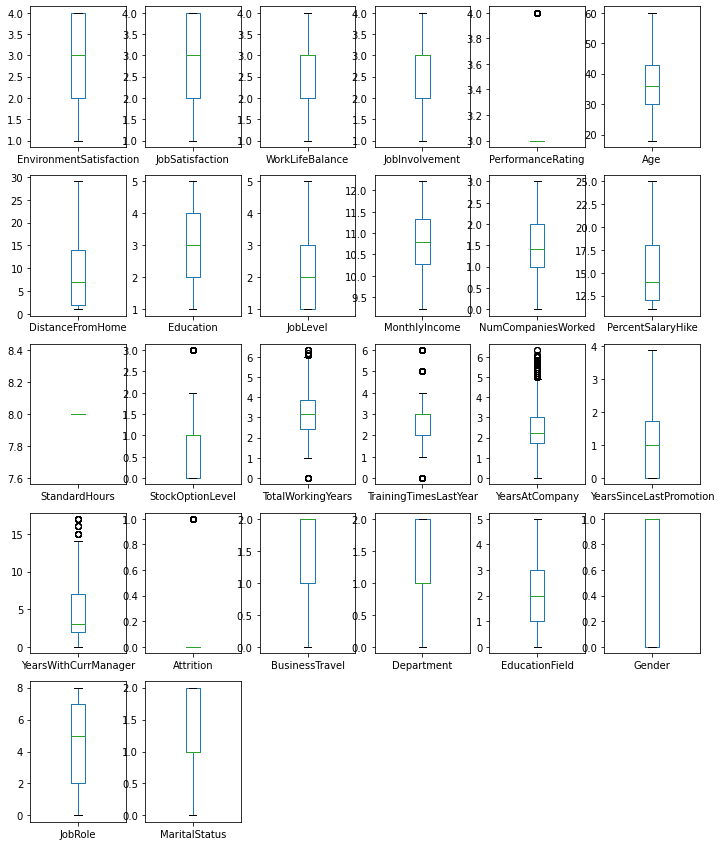

In [16]:
df5.plot(kind='box', subplots = True, layout = (5,6), figsize=(12,15));

### Train-Test Split

In [17]:
X = np.array(df5.drop('Attrition',axis=1))
y = df5.Attrition

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y)

## Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

C:\Users\Abhishek\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
logreg.score(X_test,y_test)

0.8537414965986394

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, logreg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       740
           1       0.76      0.13      0.23       142

    accuracy                           0.85       882
   macro avg       0.81      0.56      0.57       882
weighted avg       0.84      0.85      0.81       882



In [22]:
# The initial model has very low recall - most likely due to an imbalanced dataset
df5.Attrition.value_counts()

0    3699
1     711
Name: Attrition, dtype: int64

In [23]:
#let's try sample_weights = balanced
logreg = LogisticRegression(class_weight='balanced')
logreg.fit(X_train,y_train)
print(classification_report(y_test, logreg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.70      0.80       740
           1       0.32      0.73      0.44       142

    accuracy                           0.71       882
   macro avg       0.62      0.71      0.62       882
weighted avg       0.83      0.71      0.74       882



In [24]:
#the recall improved quite a lot, but precision has decreased now. Let's also try more iterations
logreg = LogisticRegression(max_iter=500)
logreg.fit(X_train,y_train)
print(classification_report(y_test, logreg.predict(X_test)))
#the model converges within 200 iterations, but the scores havent improved much.

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       740
           1       0.76      0.13      0.23       142

    accuracy                           0.85       882
   macro avg       0.81      0.56      0.57       882
weighted avg       0.84      0.85      0.81       882



C:\Users\Abhishek\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#Finally, let's also try GridSearchCV to see if other combinations of hyperparameters work better
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
parameters = {'solver': ['lbfgs', 'liblinear', 'saga'],
              'penalty' : ['l1', 'l2', 'none'],
              'tol' : [0.001, 0.00001, 0.0001],
              'max_iter': [400,500,600]}
gcv = GridSearchCV(logreg, param_grid = parameters, scoring = 'f1',verbose=1)
gcv.fit(X_train,y_train)

In [97]:
gcv.best_params_

{'max_iter': 400, 'penalty': 'l2', 'solver': 'saga', 'tol': 0.0001}

In [98]:
print(classification_report(y_test,gcv.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.68      0.78       740
           1       0.29      0.70      0.41       142

    accuracy                           0.68       882
   macro avg       0.61      0.69      0.60       882
weighted avg       0.82      0.68      0.72       882



#### Even after running GridSearchCV with different hyperparameter combinations, the classification report remained same. Let us now try a different model.

# RandomForestClassifier

In [25]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 500)
rfc.fit(X_train, y_train)
print(classification_report(y_test, rfc.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       740
           1       1.00      0.98      0.99       142

    accuracy                           1.00       882
   macro avg       1.00      0.99      0.99       882
weighted avg       1.00      1.00      1.00       882



#### RandomForestClassifier does a much better job at predicting our target variable. Both precision and recall are high for both the classes. On the surface, this seems to be a good model for predicting whether an employee will leave the company or not, based on the features we have selected. 

#### Let us still go through a few more models just to see how good they perform:

In [27]:
#AdaBoost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
ada = AdaBoostClassifier(n_estimators=2000)
ada.fit(X_train,y_train)
print(classification_report(y_test, ada.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94       740
           1       0.73      0.51      0.60       142

    accuracy                           0.89       882
   macro avg       0.82      0.74      0.77       882
weighted avg       0.88      0.89      0.88       882



In [112]:
ada = AdaBoostClassifier(n_estimators=5000)
ada.fit(X_train,y_train)
print(classification_report(y_test, ada.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       740
           1       0.78      0.61      0.69       142

    accuracy                           0.91       882
   macro avg       0.85      0.79      0.82       882
weighted avg       0.90      0.91      0.90       882



In [113]:
ada = AdaBoostClassifier(n_estimators=6000)
ada.fit(X_train,y_train)
print(classification_report(y_test, ada.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       740
           1       0.80      0.65      0.72       142

    accuracy                           0.92       882
   macro avg       0.87      0.81      0.84       882
weighted avg       0.91      0.92      0.91       882



<b>AdaBoostClassifier's precision and recall keep increasing as n_estimators are increased. Still, when compared with RandomForestClassifier, it not only performs worse in terms of scores, but also in terms of speed. Even at 5000 estimators, we don't seem to have reached the best score with AdaBoostClassifier</b>

In [114]:
ada = AdaBoostClassifier(n_estimators=12000)
ada.fit(X_train,y_train)
print(classification_report(y_test, ada.predict(X_test)))
#still improving at 12000 estimators!

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       740
           1       0.89      0.85      0.87       142

    accuracy                           0.96       882
   macro avg       0.93      0.91      0.92       882
weighted avg       0.96      0.96      0.96       882



<b> However, as soon as we use AdaBoostClassifier where the base_estimator is a DecisionTreeClassifier with max_depth of 2, instead of the default 1, the precision and recall shoot up to levels similar to RandomForestClassifier, as observed below: </b>

In [28]:
from sklearn.tree import DecisionTreeClassifier
ada = AdaBoostClassifier(n_estimators=500, base_estimator = DecisionTreeClassifier(max_depth=2))
ada.fit(X_train,y_train)
print(classification_report(y_test, ada.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       740
           1       0.98      0.98      0.98       142

    accuracy                           0.99       882
   macro avg       0.99      0.99      0.99       882
weighted avg       0.99      0.99      0.99       882



#### Let's give GradientBoostingClassifier a shot:

In [29]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=500)
gbc.fit(X_train,y_train)
print(classification_report(y_test, gbc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       740
           1       0.98      0.87      0.92       142

    accuracy                           0.98       882
   macro avg       0.98      0.93      0.95       882
weighted avg       0.98      0.98      0.98       882



In [30]:
gbc = GradientBoostingClassifier(n_estimators=800)
gbc.fit(X_train,y_train)
print(classification_report(y_test, gbc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       740
           1       0.98      0.97      0.98       142

    accuracy                           0.99       882
   macro avg       0.99      0.98      0.99       882
weighted avg       0.99      0.99      0.99       882



#### GradientBoostingClassifier is also doing a good job at predicting Employee Attrition, albeit it is slightly slightly worse than RandomForest and AdaBoost in terms of the number of estimators required.

# Conclusion

After performing the data preprocessing, model building and validation, it's safe to say that RandomForestClassifier, AdaBoostClassifier and GradientBoostingClassifier are all good models for predicting the probability that an employee will leave the company. The AdaBoostClassifier needed some minor tweaking to reach the same scores as the other two, but after this tweaking it performed just as good. 

The patterns present in the data can help the management understand why the employee attrition is high, and what can be done to lower it. This can help the company preserve its assets better and reduce costs related to hiring a lot of new employees every year. 